In [56]:
import keras as keras
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten, BatchNormalization, MaxPooling2D
from keras.initializers import glorot_uniform
from keras.initializers import Constant
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler

import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.datasets import cifar10, mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Resizing, RandomCrop, RandomFlip, RandomRotation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import math
from IPython.display import Image
import math 
from numba import jit
import xml.etree.ElementTree as ET
import argparse
import glob
import shutil


In [50]:
file_path = '/Users/werther/221212_Project1/non_object/' # 바꿔야하는 이미지가 들어있는 파일
file_names = os.listdir(file_path)

file_names

['pepsi_zero_355_1314.jpg',
 'pepsi_zero_355_1472.jpg',
 'pepsi_zero_355_169.jpg',
 'pepsi_zero_355_1466.jpg',
 'pepsi_zero_355_1300.jpg',
 'pepsi_zero_355_1328.jpg',
 'pepsi_zero_355_633.jpg',
 'pepsi_zero_355_155.jpg',
 'pepsi_zero_355_2147.jpg',
 'pepsi_zero_355_141.jpg',
 'pepsi_zero_355_2153.jpg',
 'pepsi_zero_355_627.jpg',
 'pepsi_zero_355_814.jpg',
 'pepsi_zero_355_800.jpg',
 'pepsi_zero_355_828.jpg',
 'pepsi_zero_355_2184.jpg',
 'pepsi_zero_355_196.jpg',
 'pepsi_zero_355_2190.jpg',
 'pepsi_zero_355_182.jpg',
 'pepsi_zero_355_1499.jpg',
 'pepsi_zero_355_1670.jpg',
 'pepsi_zero_355_1116.jpg',
 'pepsi_zero_355_419.jpg',
 'pepsi_zero_355_1102.jpg',
 'pepsi_zero_355_1664.jpg',
 'pepsi_zero_355_1894.jpg',
 'pepsi_zero_355_357.jpg',
 'pepsi_zero_355_431.jpg',
 'pepsi_zero_355_425.jpg',
 'pepsi_zero_355_343.jpg',
 'pepsi_zero_355_1880.jpg',
 'pepsi_zero_355_1658.jpg',
 'pepsi_zero_355_394.jpg',
 'pepsi_zero_355_1857.jpg',
 'pepsi_zero_355_1843.jpg',
 'pepsi_zero_355_380.jpg',
 'pepsi_z

In [2]:
# 사진 이름 한번에 바꾸기
# file_name을 정렬해야된다는 이슈가 있다.
import os
file_path = '/Users/werther/221212_Project1/non_object/' # 바꿔야하는 이미지가 들어있는 파일
file_names = os.listdir(file_path)
num = 1
for name in file_names:
    src = os.path.join(file_path, name)
    
    dst = 'non_object_' + str(num) + '.jpg' # 바꿀 이름
    dst = os.path.join(file_path, dst)
    os.rename(src, dst)
    num += 1
    

# smple = file_names.sort()
# print(file_names.sort(key=lambda x: int(x[:x.index('.')])))

In [3]:
# 없는 파일 확인하기

import os
file_path = '/Users/werther/221212_Project1/pepsi_zero_500/xml/' # 바꿔야하는 이미지가 들어있는 파일
file_names = os.listdir(file_path)
num = 1
for name in file_names:
    if num == len(file_names) :
        break
    src = os.path.join(file_path, name)
    dst = 'pepsi_zero_500_' + str(num) + '.xml'     
    if dst not in file_names :
        print(dst)

    num += 1
    

In [60]:
coca_250_xml_df

,filename,width,height,class,xmin,ymin,xmax,ymax,object,rec_width,rec_height,x,y
0,coca_cola_250_102.jpg,224,224,1,11,50,169,224,1,158,174,90.0,137.0
1,coca_cola_250_116.jpg,224,224,1,3,3,163,224,1,160,221,83.0,114.0
2,coca_cola_250_300.jpg,80,107,1,20,35,55,87,1,35,52,38.0,61.0
3,coca_cola_250_466.jpg,80,107,1,26,34,57,81,1,31,47,42.0,58.0
4,coca_cola_250_472.jpg,80,107,1,25,34,58,83,1,33,49,42.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,coca_cola_250_325.jpg,80,107,1,22,28,64,92,1,42,64,43.0,60.0
484,coca_cola_250_319.jpg,80,107,1,22,31,63,91,1,41,60,42.0,61.0
485,coca_cola_250_480.jpg,80,107,1,18,37,57,89,1,39,52,38.0,63.0
486,coca_cola_250_133.jpg,224,224,1,14,0,175,217,1,161,217,94.0,108.0


In [69]:
# XML파일이 부족 할 때 없는 XML 찾기.

def findNoXml(csv) :
    csv_list = list(csv.filename)

    num = 1
    for i in csv_list :
        if f"pepsi_250_{num}.jpg" not in csv_list :
            print(f'{num} is not here.')
        num += 1

findNoXml(pepsi_250_xml_df)

228 is not here.
229 is not here.
230 is not here.
231 is not here.
232 is not here.
233 is not here.
234 is not here.
235 is not here.
236 is not here.
237 is not here.
238 is not here.
239 is not here.
240 is not here.
241 is not here.
242 is not here.
243 is not here.
244 is not here.
245 is not here.
246 is not here.
247 is not here.
248 is not here.
249 is not here.
250 is not here.
251 is not here.
252 is not here.
253 is not here.
254 is not here.
255 is not here.
256 is not here.
257 is not here.
258 is not here.
259 is not here.
260 is not here.


In [45]:
pepsi_zero_355_xml_df

,filename,width,height,class,xmin,ymin,xmax,ymax,object,rec_width,rec_height,x,y
0,pepsi_zero_355_196.jpg,224,224,5,58,21,152,177,1,94,156,105.0,99.0
1,pepsi_zero_355_828.jpg,224,224,5,40,30,157,186,1,117,156,98.0,108.0
2,pepsi_zero_355_182.jpg,224,224,5,72,14,167,170,1,95,156,120.0,92.0
3,pepsi_zero_355_1499.jpg,224,224,5,65,33,174,187,1,109,154,120.0,110.0
4,pepsi_zero_355_814.jpg,224,224,5,38,26,155,182,1,117,156,96.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,pepsi_zero_355_819.jpg,224,224,5,40,33,157,189,1,117,156,98.0,111.0
1664,pepsi_zero_355_1480.jpg,224,224,5,57,28,159,183,1,102,155,108.0,106.0
1665,pepsi_zero_355_825.jpg,224,224,5,40,31,157,187,1,117,156,98.0,109.0
1666,pepsi_zero_355_831.jpg,224,224,5,41,40,157,196,1,116,156,99.0,118.0


In [ ]:
# yolo : 빠르게
# RCNN : 정확하게

from xml.etree.ElementTree import parse

xml_file = './image/AirPodsProCase.xml'

tree = parse(xml_file)
root = tree.getroot()

for object in root.iter('object') :
    xmin = int(object.find('bndbox').findtext('xmin'))
    ymin = int(object.find('bndbox').findtext('ymin'))
    xmax = int(object.find('bndbox').findtext('xmax'))    
    ymax = int(object.find('bndbox').findtext('ymax'))        
    print(xmin, ymin, xmax, ymax)

# Start

In [3]:
path = '/Users/werther/221212_Project1/non_object/' # folder path

os.chdir(path) # move to the folder
files = os.listdir(path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
_imgs = []
img_names = []
# print(files)

for file in files:
    if '.jpg' in file: 
        img_names.append(file.split('.')[0])
        src = cv2.imread(file)
        f = cv2.resize(src, (224, 224)) # resize img
        _imgs.append(f)
np.array(_imgs).shape

(2718, 224, 224, 3)

In [124]:
# XML to CSV

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        filename = root.find('filename').text
        width = int(root.find('size').find('width').text)
        height = int(root.find('size').find('height').text)
        for member in root.findall('object'):
            bndbox = member.find('bndbox')
            value = (filename,
                    width,
                    height,
                    member.find('name').text,
                    int(bndbox.find('xmin').text),
                    int(bndbox.find('ymin').text),
                    int(bndbox.find('xmax').text),
                    int(bndbox.find('ymax').text),
                    )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height',
                  'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


In [125]:
info = xml_to_csv('/Users/werther/221212_Project1/pepsi_zero_355/xml/')
info

,filename,width,height,class,xmin,ymin,xmax,ymax
0,pepsi_zero_355_196.jpg,1440,1440,pepsi355,371,134,978,1136
1,pepsi_zero_355_828.jpg,1440,1440,pepsi355,259,194,1008,1197
2,pepsi_zero_355_182.jpg,1440,1440,pepsi355,465,93,1072,1095
3,pepsi_zero_355_1499.jpg,1440,1440,pepsi355,421,212,1118,1204
4,pepsi_zero_355_814.jpg,1440,1440,pepsi355,247,164,996,1167
...,...,...,...,...,...,...,...,...
1663,pepsi_zero_355_819.jpg,1440,1440,pepsi355,259,212,1008,1215
1664,pepsi_zero_355_1480.jpg,1440,1440,pepsi355,365,178,1024,1176
1665,pepsi_zero_355_825.jpg,1440,1440,pepsi355,259,200,1008,1203
1666,pepsi_zero_355_831.jpg,1440,1440,pepsi355,263,256,1012,1259


In [88]:
1440 / 224

6.428571428571429

In [89]:
224 * 6.428571428571429

1440.0

In [126]:
info = info
ratio = list(info.width / 224)[0]

def resizeXMLData(info, ratio) :
    for idx in range(len(info)):
        info.loc[[idx], ['width']] = round(info.loc[[idx], ['width']] / ratio)
        info.loc[[idx], ['height']] = round(info.loc[[idx], ['height']] / ratio)
        info.loc[[idx], ["xmin"]] = round(info.loc[[idx], ['xmin']] / ratio)
        info.loc[[idx], ['ymin']] = round(info.loc[[idx], ['ymin']] / ratio)
        info.loc[[idx], ['xmax']] = round(info.loc[[idx], ['xmax']] / ratio) 
        info.loc[[idx], ['ymax']] = round(info.loc[[idx], ['ymax']] / ratio)
    
    

In [130]:
info.loc[:, ['class']] = "pepsi_zero"
info

,filename,width,height,class,xmin,ymin,xmax,ymax
0,pepsi_zero_355_196.jpg,224,224,pepsi_zero,58,21,152,177
1,pepsi_zero_355_828.jpg,224,224,pepsi_zero,40,30,157,186
2,pepsi_zero_355_182.jpg,224,224,pepsi_zero,72,14,167,170
3,pepsi_zero_355_1499.jpg,224,224,pepsi_zero,65,33,174,187
4,pepsi_zero_355_814.jpg,224,224,pepsi_zero,38,26,155,182
...,...,...,...,...,...,...,...,...
1663,pepsi_zero_355_819.jpg,224,224,pepsi_zero,40,33,157,189
1664,pepsi_zero_355_1480.jpg,224,224,pepsi_zero,57,28,159,183
1665,pepsi_zero_355_825.jpg,224,224,pepsi_zero,40,31,157,187
1666,pepsi_zero_355_831.jpg,224,224,pepsi_zero,41,40,157,196


# FILE : 주소입력 -> DataFrame

In [ ]:
def non_to_df(path) : # non-object를 dtaframe으로
    file_names = os.listdir(path)
    non_list = []
    
    for name in file_names : 
        value = (name,0,0,0,0,0,0,0,0)
        non_list.append(value)
    column_name = ['filename', 'width', 'height',
                  'class', 'xmin', 'ymin', 'xmax', 'ymax', 'object']
    non_df = pd.DataFrame(non_list, columns=column_name)
    return non_df

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        filename = root.find('filename').text
        width = int(root.find('size').find('width').text)
        height = int(root.find('size').find('height').text)
        for member in root.findall('object'):
            bndbox = member.find('bndbox')
            value = (filename,
                    width,
                    height,
                    member.find('name').text,
                    int(bndbox.find('xmin').text),
                    int(bndbox.find('ymin').text),
                    int(bndbox.find('xmax').text),
                    int(bndbox.find('ymax').text),
                    )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height',
                  'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

def resizeXMLData(info, width_ratio, height_ratio, classNum) :
    if classNum >= 1:
        info.loc[:, ['object']] = 1
    else :
        info.loc[:, ['object']] = 0        
    info.loc[:, ['class']] = classNum
    for idx in range(len(info)):
        info.loc[[idx], ['width']] = round(info.loc[[idx], ['width']] / width_ratio)
        info.loc[[idx], ['height']] = round(info.loc[[idx], ['height']] / height_ratio)
        info.loc[[idx], ["xmin"]] = round(info.loc[[idx], ['xmin']] / width_ratio)
        info.loc[[idx], ['ymin']] = round(info.loc[[idx], ['ymin']] / height_ratio)
        info.loc[[idx], ['xmax']] = round(info.loc[[idx], ['xmax']] / width_ratio)
        info.loc[[idx], ['ymax']] = round(info.loc[[idx], ['ymax']] / height_ratio)
        info['rec_width'] = info['xmax'] - info['xmin']
        info['rec_height'] = info['ymax'] - info['ymin']
        info['x'] = round((info.xmin + info.xmax)/2)  #바인딩 박스 중심 x점
        info['y'] = round((info.ymin + info.ymax)/2)  #바인딩 박스 중심 y점


def checkAll(path, xml_path='no', classNum=0, is_non=False) :
    os.chdir(path) # move to the folder
    files = os.listdir(path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
    img_names = []
    # print(files)

    for file in files:
        if '.jpg' in file: 
            img_names.append(file.split('.')[0])
            src = cv2.imread(file)
            f = cv2.resize(src, (224, 224)) # resize img
            globals()['imgs'].append(f)
    np.array(imgs).shape    
    
    if is_non == True :
        return non_to_df(path)
    
    xml_df = xml_to_csv(xml_path)
    
    width_ratio = list(xml_df.width / 224)[0]
    height_ratio = list(xml_df.height / 224)[0]
    
    resizeXMLData(xml_df, width_ratio, height_ratio, classNum)
    
    
    return xml_df

# FILE :  XML to TXT
### 데이터 경로를 잡은 후 YOLO 폴더 안에 img,txt 파일 저장.

In [128]:
def resizeXMLData2(info, width_ratio, height_ratio, classNum) : # write XML DF
#     if classNum >= 1:
#         info.loc[:, ['object']] = 1
#     else :
#         info.loc[:, ['object']] = 0        
    info.loc[:, ['class']] = classNum
    for idx in range(len(info)):
        info.loc[[idx], ['width']] = round(info.loc[[idx], ['width']] / width_ratio)
        info.loc[[idx], ['height']] = round(info.loc[[idx], ['height']] / height_ratio)
        info.loc[[idx], ["xmin"]] = round(info.loc[[idx], ['xmin']] / width_ratio)
        info.loc[[idx], ['ymin']] = round(info.loc[[idx], ['ymin']] / height_ratio)
        info.loc[[idx], ['xmax']] = round(info.loc[[idx], ['xmax']] / width_ratio)
        info.loc[[idx], ['ymax']] = round(info.loc[[idx], ['ymax']] / height_ratio)
        info['rec_width'] = info['xmax'] - info['xmin']
        info['rec_height'] = info['ymax'] - info['ymin']
        info['x'] = round((info.xmin + info.xmax)/2)  #바인딩 박스 중심 x점
        info['y'] = round((info.ymin + info.ymax)/2)  #바인딩 박스 중심 y점
 
    info = info.drop(['xmax','xmin', 'ymin', 'ymax', 'ymax'], axis=1)
    return info

# 경로 설정
def writeTxt(path, df, ratio=0.2): # XML to TXT
    
    for i in range(round(len(df) * ratio)):
        name = df.loc[i, "filename"][:-4]
        path2 = f'/Users/werther/yolov5/data/images/Drink/val/{name}.txt' #경로 설정
        
        f = open(path2, 'w')
        
        c = df["class"].values[i]
        w = df["rec_width"].values[i] / df["width"].values[i]
        h = df["rec_height"].values[i] / df["height"].values[i]
        x = df['x'].values[i] / df["width"].values[i]
        y = df["y"].values[i] / df["height"].values[i]
        
        data = f"{c} {x} {y} {w} {h}"
        f.write(data)
        f.close()
        
    for i in range(round(len(df) * ratio), len(df)):
        name = df.loc[i, "filename"][:-4]
        path2 = f'/Users/werther/yolov5/data/images/Drink/train/{name}.txt' #경로 설정
        
        f = open(path2, 'w')
        
        c = df["class"].values[i]
        w = df["rec_width"].values[i] / df["width"].values[i]
        h = df["rec_height"].values[i] / df["height"].values[i]
        x = df['x'].values[i] / df["width"].values[i]
        y = df["y"].values[i] / df["height"].values[i]
        
        data = f"{c} {x} {y} {w} {h}"
        f.write(data)
        f.close()        
    
def checkAll2(path, xml_path='no', classNum=0, is_non=False, copy=True, ratio=0.2) :
    os.chdir(path) # move to the folder
    files = os.listdir(path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
    img_names = []
    # print(files)
            
    for file in files[:round(len(files) * ratio)]:
        if '.jpg' in file: 
            img_names.append(file.split('.')[0])
            src = cv2.imread(file)
            f = cv2.resize(src, (224, 224)) # resize img
            if copy == True :
                shutil.copy(f'{path}{file}', '/Users/werther/yolov5/data/images/Drink/val/') #파일 복사 붙여넣기

    for file in files[round(len(files) * ratio) : len(files)]:
        if '.jpg' in file: 
            img_names.append(file.split('.')[0])
            src = cv2.imread(file)
            f = cv2.resize(src, (224, 224)) # resize img
            if copy == True :
                shutil.copy(f'{path}{file}', '/Users/werther/yolov5/data/images/Drink/train/') #파일 복사 붙여넣기
                
    if is_non == True : # if nonobject
        return non_to_df(path)
    
    xml_df = xml_to_csv(xml_path) 
    
    width_ratio = list(xml_df.width / 224)[0]
    height_ratio = list(xml_df.height / 224)[0]
    
    xml_df = resizeXMLData2(xml_df, width_ratio, height_ratio, classNum) # write XML DF
    
    writeTxt(path, xml_df, ratio) # XML to TXT
    
    return xml_df


# 모든 데이터 DF화

In [5]:
globals()['imgs'] = []

# pepsi
pepsi_zero_355_path = '/Users/werther/221212_Project1/pepsi_zero_355/'
pepsi_zero_355_xml_path = '/Users/werther/221212_Project1/pepsi_zero_355/xml/'
pepsi_zero_355_xml_df = checkAll(pepsi_zero_355_path, pepsi_zero_355_xml_path, 5)

pepsi_zero_500_path = '/Users/werther/221212_Project1/pepsi_zero_500/'
pepsi_zero_500_xml_path = '/Users/werther/221212_Project1/pepsi_zero_500/xml/'
pepsi_zero_500_xml_df = checkAll(pepsi_zero_500_path, pepsi_zero_500_xml_path, 6)

pepsi_250_path = '/Users/werther/221212_Project1/pepsi_250/'
pepsi_250_xml_path = '/Users/werther/221212_Project1/pepsi_250/xml/'
pepsi_250_xml_df = checkAll(pepsi_250_path, pepsi_250_xml_path, 3)

pepsi_355_path = '/Users/werther/221212_Project1/pepsi_355/'
pepsi_355_xml_path = '/Users/werther/221212_Project1/pepsi_355/xml/'
pepsi_355_xml_df = checkAll(pepsi_355_path, pepsi_355_xml_path, 4)

# coca
coca_250_path = '/Users/werther/221212_Project1/coca_cola_250/'
coca_250_xml_path = '/Users/werther/221212_Project1/coca_cola_250/xml/'
coca_250_xml_df = checkAll(coca_250_path, coca_250_xml_path, 1)

coca_350_path = '/Users/werther/221212_Project1/coca_cola_350/'
coca_350_xml_path = '/Users/werther/221212_Project1/coca_cola_350/xml/'
coca_350_xml_df = checkAll(coca_350_path, coca_350_xml_path, 2)

coca_z_250_path = '/Users/werther/221212_Project1/coca_cola_zero_250/'
coca_z_250_xml_path = '/Users/werther/221212_Project1/coca_cola_zero_250/xml/'
coca_z_250_xml_df = checkAll(coca_z_250_path, coca_z_250_xml_path, 9)

coca_z_355_path = '/Users/werther/221212_Project1/coca_cola_zero_355/'
coca_z_355_xml_path = '/Users/werther/221212_Project1/coca_cola_zero_355/xml/'
coca_z_355_xml_df = checkAll(coca_z_355_path, coca_z_355_xml_path, 10)

#chilsung
chil_250_path = '/Users/werther/221212_Project1/chilsung_250/'
chil_250_xml_path = '/Users/werther/221212_Project1/chilsung_250/xml/'
chil_250_xml_df = checkAll(chil_250_path, chil_250_xml_path, 11)

chil_355_path = '/Users/werther/221212_Project1/chilsung_355/'
chil_355_xml_path = '/Users/werther/221212_Project1/chilsung_355/xml/'
chil_355_xml_df = checkAll(chil_355_path, chil_355_xml_path, 12)

# pocari
pocari_240_path = '/Users/werther/221212_Project1/pocari_240/'
pocari_240_xml_path = '/Users/werther/221212_Project1/pocari_240/xml/'
pocari_240_xml_df = checkAll(pocari_240_path, pocari_240_xml_path, 7)

pocari_620_path = '/Users/werther/221212_Project1/pocari_620/'
pocari_620_xml_path = '/Users/werther/221212_Project1/pocari_620/xml/'
pocari_620_xml_df = checkAll(pocari_620_path, pocari_620_xml_path, 8)

# sprite
spr_250_path = '/Users/werther/221212_Project1/sprite_250/'
spr_250_xml_path = '/Users/werther/221212_Project1/sprite_250/xml/'
spr_250_xml_df = checkAll(spr_250_path, spr_250_xml_path, 13)

spr_350_path = '/Users/werther/221212_Project1/sprite_350/'
spr_350_xml_path = '/Users/werther/221212_Project1/sprite_350/xml/'
spr_350_xml_df = checkAll(spr_350_path, spr_350_xml_path, 14)


# non_object
path = '/Users/werther/221212_Project1/non_object/'
non_df = checkAll(path, is_non=True)

# YOLO 데이터 labels파일 구축

In [129]:
# globals()['imgs'] = []

# pepsi
pepsi_zero_355_path = '/Users/werther/221212_Project1/pepsi_zero_355/'
pepsi_zero_355_xml_path = '/Users/werther/221212_Project1/pepsi_zero_355/xml/'
pepsi_zero_355_xml_df = checkAll2(pepsi_zero_355_path, pepsi_zero_355_xml_path, 5)

pepsi_zero_500_path = '/Users/werther/221212_Project1/pepsi_zero_500/'
pepsi_zero_500_xml_path = '/Users/werther/221212_Project1/pepsi_zero_500/xml/'
pepsi_zero_500_xml_df = checkAll2(pepsi_zero_500_path, pepsi_zero_500_xml_path, 6)

pepsi_250_path = '/Users/werther/221212_Project1/pepsi_250/'
pepsi_250_xml_path = '/Users/werther/221212_Project1/pepsi_250/xml/'
pepsi_250_xml_df = checkAll2(pepsi_250_path, pepsi_250_xml_path, 3)

pepsi_355_path = '/Users/werther/221212_Project1/pepsi_355/'
pepsi_355_xml_path = '/Users/werther/221212_Project1/pepsi_355/xml/'
pepsi_355_xml_df = checkAll2(pepsi_355_path, pepsi_355_xml_path, 4)

# coca
coca_250_path = '/Users/werther/221212_Project1/coca_cola_250/'
coca_250_xml_path = '/Users/werther/221212_Project1/coca_cola_250/xml/'
coca_250_xml_df = checkAll2(coca_250_path, coca_250_xml_path, 1)

coca_350_path = '/Users/werther/221212_Project1/coca_cola_350/'
coca_350_xml_path = '/Users/werther/221212_Project1/coca_cola_350/xml/'
coca_350_xml_df = checkAll2(coca_350_path, coca_350_xml_path, 2)

coca_z_250_path = '/Users/werther/221212_Project1/coca_cola_zero_250/'
coca_z_250_xml_path = '/Users/werther/221212_Project1/coca_cola_zero_250/xml/'
coca_z_250_xml_df = checkAll2(coca_z_250_path, coca_z_250_xml_path, 9)

coca_z_355_path = '/Users/werther/221212_Project1/coca_cola_zero_355/'
coca_z_355_xml_path = '/Users/werther/221212_Project1/coca_cola_zero_355/xml/'
coca_z_355_xml_df = checkAll2(coca_z_355_path, coca_z_355_xml_path, 10)

#chilsung
chil_250_path = '/Users/werther/221212_Project1/chilsung_250/'
chil_250_xml_path = '/Users/werther/221212_Project1/chilsung_250/xml/'
chil_250_xml_df = checkAll2(chil_250_path, chil_250_xml_path, 11)

chil_355_path = '/Users/werther/221212_Project1/chilsung_355/'
chil_355_xml_path = '/Users/werther/221212_Project1/chilsung_355/xml/'
chil_355_xml_df = checkAll2(chil_355_path, chil_355_xml_path, 12)

# pocari
pocari_240_path = '/Users/werther/221212_Project1/pocari_240/'
pocari_240_xml_path = '/Users/werther/221212_Project1/pocari_240/xml/'
pocari_240_xml_df = checkAll2(pocari_240_path, pocari_240_xml_path, 7)

pocari_620_path = '/Users/werther/221212_Project1/pocari_620/'
pocari_620_xml_path = '/Users/werther/221212_Project1/pocari_620/xml/'
pocari_620_xml_df = checkAll2(pocari_620_path, pocari_620_xml_path, 8)

# sprite
spr_250_path = '/Users/werther/221212_Project1/sprite_250/'
spr_250_xml_path = '/Users/werther/221212_Project1/sprite_250/xml/'
spr_250_xml_df = checkAll2(spr_250_path, spr_250_xml_path, 13)

spr_350_path = '/Users/werther/221212_Project1/sprite_350/'
spr_350_xml_path = '/Users/werther/221212_Project1/sprite_350/xml/'
spr_350_xml_df = checkAll2(spr_350_path, spr_350_xml_path, 14)


# non_object
# path = '/Users/werther/221212_Project1/non_object/'
# non_df = checkAll(path, is_non=True)

In [ ]:
'/Users/werther/221212_Project1/pepsi_zero_355/'

In [6]:
np.array(imgs).shape

(15100, 224, 224, 3)

In [7]:
total_x = np.array(imgs)
total_x.shape

(15100, 224, 224, 3)

In [9]:
total_info_df = pd.concat([pepsi_zero_355_xml_df,
                    pepsi_zero_500_xml_df,
                    pepsi_250_xml_df,
                    pepsi_355_xml_df,
                    coca_250_xml_df,
                    coca_350_xml_df,
                    coca_z_250_xml_df,
                    coca_z_355_xml_df,
                    chil_250_xml_df,
                    chil_355_xml_df,
                    pocari_240_xml_df,
                    pocari_620_xml_df,
                    spr_250_xml_df,
                    spr_350_xml_df, 
                    non_df])

Y = total_info_df[['class', 'rec_width', 'rec_height', 'x', 'y', 'object']]

In [10]:
total_info_df

,filename,width,height,class,xmin,ymin,xmax,ymax,object,rec_width,rec_height,x,y
0,pepsi_zero_355_196.jpg,224,224,5,58,21,152,177,1,94.0,156.0,105.0,99.0
1,pepsi_zero_355_828.jpg,224,224,5,40,30,157,186,1,117.0,156.0,98.0,108.0
2,pepsi_zero_355_182.jpg,224,224,5,72,14,167,170,1,95.0,156.0,120.0,92.0
3,pepsi_zero_355_1499.jpg,224,224,5,65,33,174,187,1,109.0,154.0,120.0,110.0
4,pepsi_zero_355_814.jpg,224,224,5,38,26,155,182,1,117.0,156.0,96.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,non_object_1568.jpg,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2714,non_object_544.jpg,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2715,non_object_2075.jpg,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2716,non_object_2713.jpg,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [11]:
x_train, x_test, y_train, y_test = train_test_split(total_x, Y,
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    stratify=Y['class'], #class를 기준으로
                                                    random_state=34)

In [12]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(12080, 224, 224, 3) (3020, 224, 224, 3) (12080, 6) (3020, 6)


# 넘파이 변환

In [13]:
y_test = y_test.fillna(0)
y_train = y_train.fillna(0)

# y_train = np.array(y_train)
# y_test = np.array(y_test)

In [18]:
# y_train_c : class
y_train_c = y_train['class']
y_train_c = np.array(y_train_c)
y_train_c = to_categorical(y_train_c)

y_test_c = y_test['class']
y_test_c = np.array(y_test_c)
y_test_c = to_categorical(y_test_c)
y_test_c.shape

(3020, 15)

In [15]:
# y_train_4 : 4 columns
y_train_4 = y_train.iloc[:, 1:5]
y_train_4 = np.array(y_train_4)
y_train_4.shape

y_test_4 = y_test.iloc[:, 1:5]
y_test_4 = np.array(y_test_4)
y_test_4.shape

(3020, 4)

In [16]:
y_train_o = y_train['object']
y_train_o = np.array(y_train_o)
y_train_o = to_categorical(y_train_o)
y_train_o.shape

y_test_o = y_test['object']
y_test_o = np.array(y_test_o)
y_test_o = to_categorical(y_test_o)
y_test_o.shape

(3020, 2)

# normalize

In [251]:
# normalizing
x_train = x_train/255
x_test = x_test/255


# Model Function

In [ ]:
class MyCallback(Callback):
    def on_epoch_end(self, end, logs={}):
        if logs.get('val_acc') > 0.95:
            self.model.stop_training = True
            print('\n')
            print('목표 정확도 달성: 검증 정확도 %.4f' % logs.get('val_acc'))
my_callback = MyCallback()



def mdFit(model, num, X_train, y_train, x_test, y_test, epochs, my_callback) : # + best model select.

    model.summary()
       
    best_model_path = f"./bestModel/LeNet5/best_cnn_model{num}.h5" 
    save_best_model = ModelCheckpoint(best_model_path,
                                      monitor='val_loss',
                                      save_best_only=True,
                                      save_weights_only=False)

    globals()[f'hist{num}'] = model.fit(
        x=X_train, y=y_train, batch_size=128, epochs=epochs, verbose=1,
        callbacks=[my_callback ,save_best_model], validation_data=(x_test, y_test)) # validation_split=0.2
    # validation : (x_test, y_test)값을 가지고 와서 봐도 된다. 현재 0.2의 비율로 가져와서
    
    globals()[f'best_model{num}'] = load_model(best_model_path)
    globals()[f'best_model{num}'].summary()
    
    
def mdEval(model, x_tst, y_tst) :
    model.evaluate(x_tst, y_tst, batch_size=30, verbose=1)
    
def mdPred(model, X_tst) :
    result = model.predict(X_tst)
    return result

# Model Network

In [20]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

## Model_1

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


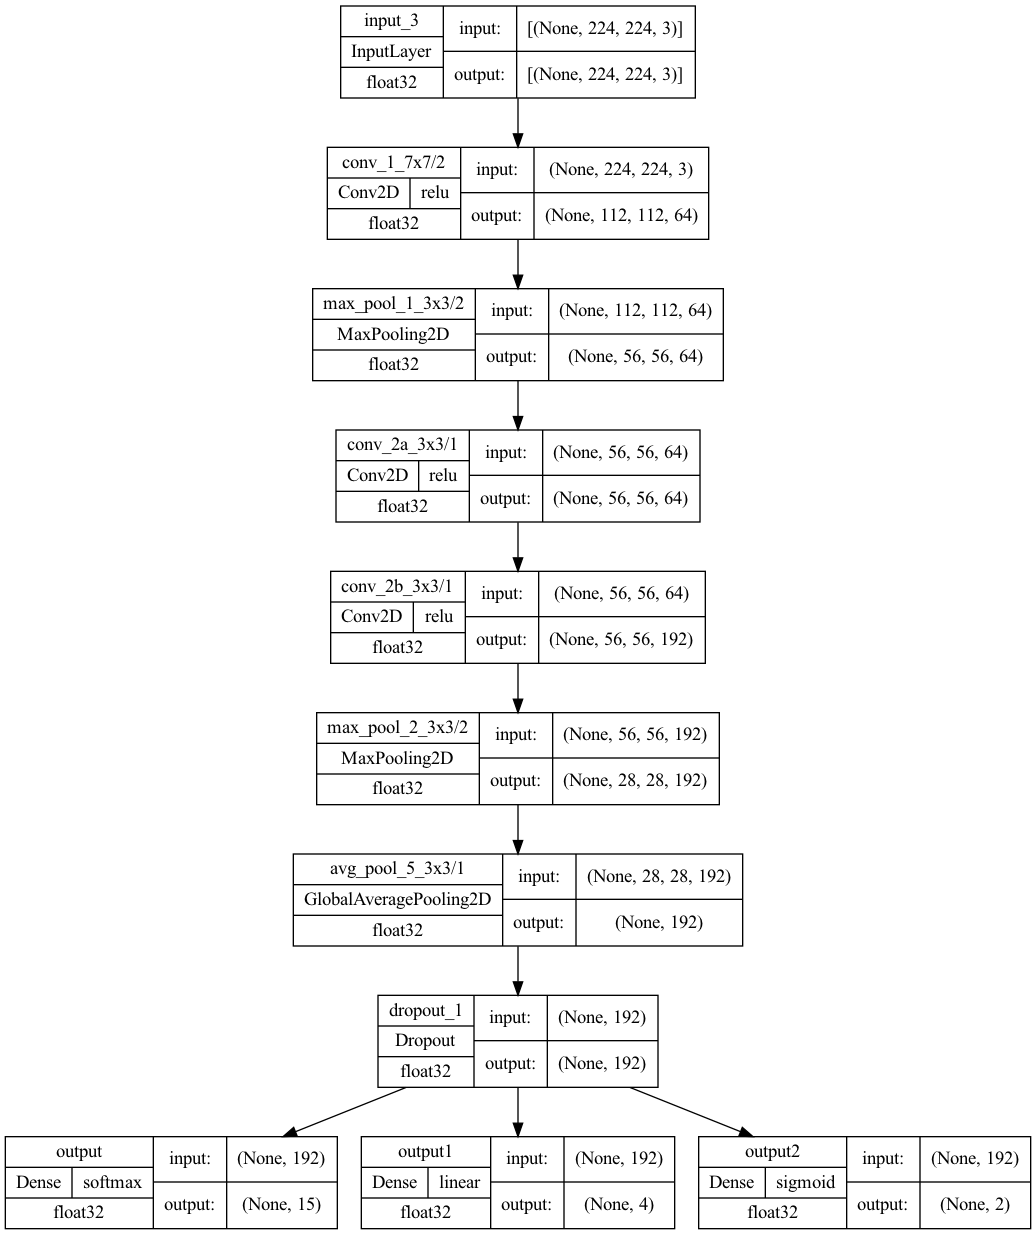

In [22]:
input_layer = Input(shape=(224, 224, 3))

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)
y = Dropout(0.4)(x)

x = Dense(15, activation='softmax', name='output')(y)
x1 = Dense(4, activation='linear', name='output1')(y)
x2 = Dense(2, activation='sigmoid', name='output2')(y)

model = Model(input_layer, [x, x1, x2], name='inception_v1')

model.compile(optimizer='adam',
              loss=['categorical_crossentropy',
                   'mse',
                   'binary_crossentropy'],
              # loss_weights=[0.5, 0.5, 0.5],
              #No OneHot Encoding : sparse_categorical_crossentropy
              metrics=['accuracy']) #acc, accuracy

plot_model(model, show_shapes=True, show_dtype=True, show_layer_activations=True)
# model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [224]:
mdFit(model, 1, x_train, y_trian=[y_train_c, y_train_4, y_train_o], 
      x_test, y_test=[y_test_c, y_test_4, y_test_o], epochs=30, my_callback)



SyntaxError: positional argument follows keyword argument (2735503369.py, line 2)

In [23]:
history = model.fit(x_train, [y_train_c, y_train_4, y_train_o], 
                    validation_data = (x_test, [y_test_c, y_test_4, y_test_o]), 
                    epochs=50, batch_size=320) # , callbacks=my_callback


Epoch 1/50
38/38 [==============================] - 179s 5s/step - loss: 1752.4976 - output_loss: 37.6533 - output1_loss: 3461.9629 - output2_loss: 5.3797 - output_accuracy: 0.0909 - output1_accuracy: 0.3205 - output2_accuracy: 0.7600 - val_loss: 1222.2014 - val_output_loss: 8.5990 - val_output1_loss: 2433.2163 - val_output2_loss: 2.5872 - val_output_accuracy: 0.1695 - val_output1_accuracy: 0.4215 - val_output2_accuracy: 0.8199
Epoch 2/50
38/38 [==============================] - 188s 5s/step - loss: 1289.2383 - output_loss: 26.0079 - output1_loss: 2548.5015 - output2_loss: 3.9667 - output_accuracy: 0.1031 - output1_accuracy: 0.3489 - output2_accuracy: 0.7950 - val_loss: 1241.8073 - val_output_loss: 6.6183 - val_output1_loss: 2474.7283 - val_output2_loss: 2.2680 - val_output_accuracy: 0.2818 - val_output1_accuracy: 0.4222 - val_output2_accuracy: 0.8199
Epoch 3/50
38/38 [==============================] - 182s 5s/step - loss: 1149.9608 - output_loss: 18.8334 - output1_loss: 2278.2800 - ou

38/38 [==============================] - 177s 5s/step - loss: 358.0359 - output_loss: 0.3534 - output1_loss: 715.6696 - output2_loss: 0.0488 - output_accuracy: 0.8748 - output1_accuracy: 0.5507 - output2_accuracy: 0.9855 - val_loss: 314.4705 - val_output_loss: 0.1285 - val_output1_loss: 628.7721 - val_output2_loss: 0.0403 - val_output_accuracy: 0.9593 - val_output1_accuracy: 0.5894 - val_output2_accuracy: 0.9897
Epoch 40/50
38/38 [==============================] - 177s 5s/step - loss: 376.2592 - output_loss: 0.4027 - output1_loss: 752.0574 - output2_loss: 0.0583 - output_accuracy: 0.8639 - output1_accuracy: 0.5531 - output2_accuracy: 0.9825 - val_loss: 313.4431 - val_output_loss: 0.1750 - val_output1_loss: 626.6724 - val_output2_loss: 0.0389 - val_output_accuracy: 0.9235 - val_output1_accuracy: 0.5795 - val_output2_accuracy: 0.9861
Epoch 41/50
38/38 [==============================] - 177s 5s/step - loss: 370.4969 - output_loss: 0.3829 - output1_loss: 740.5615 - output2_loss: 0.0494 - o

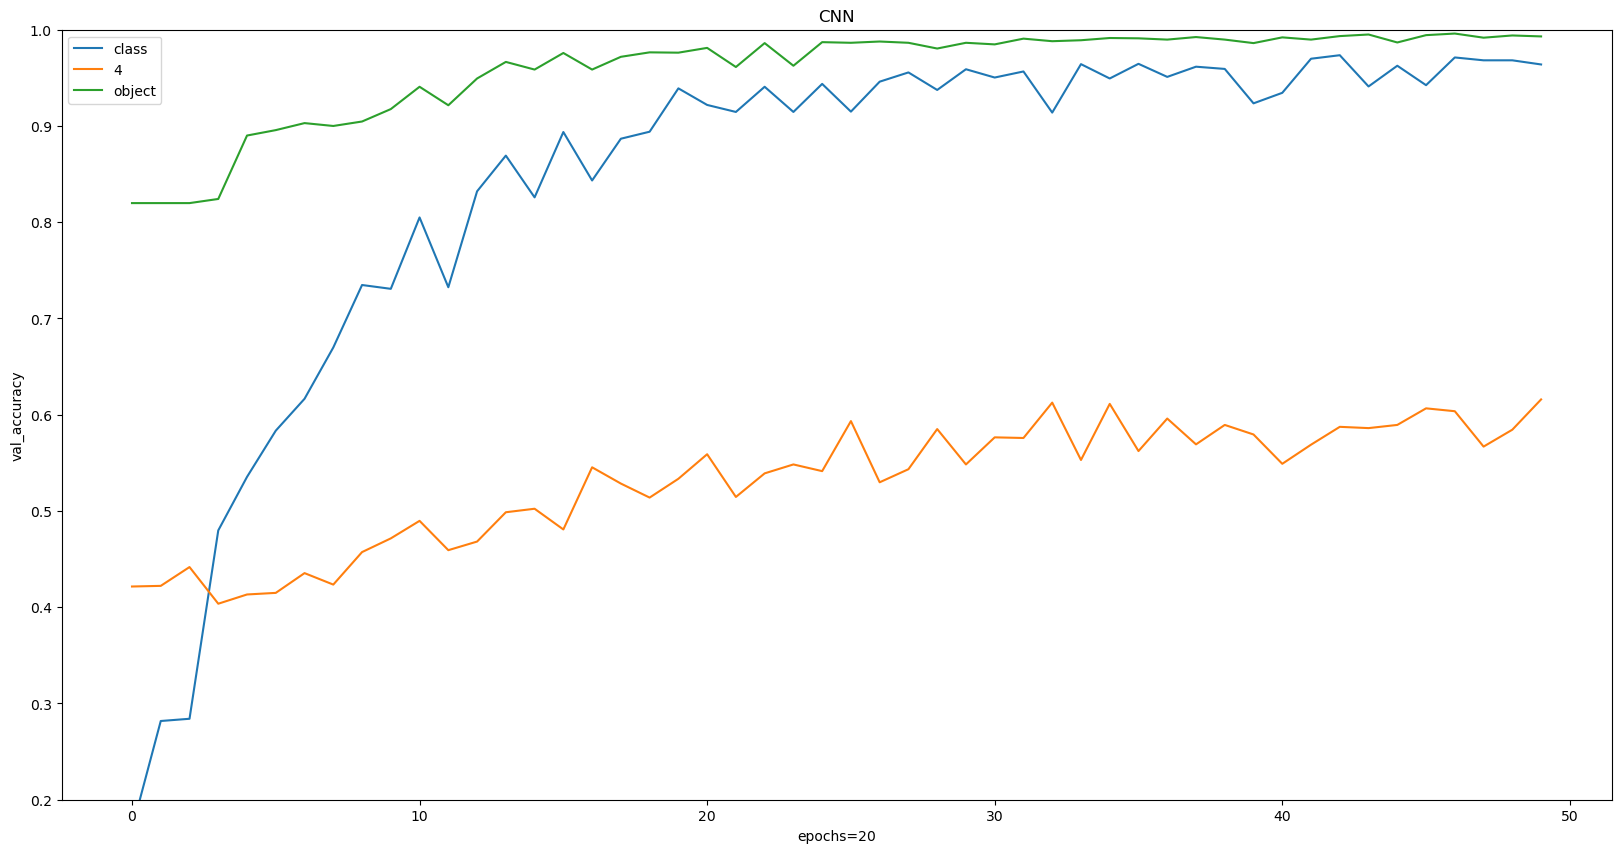

In [35]:
plt.figure(figsize=(20,10))

plt.plot(history.history['val_output_accuracy'], label='class')
plt.plot(history.history['val_output1_accuracy'], label='4')
plt.plot(history.history['val_output2_accuracy'], label='object')

plt.ylim(0.2, 1)
plt.title("CNN")
plt.ylabel("val_accuracy")
plt.xlabel("epochs=20")
plt.legend()

In [36]:
pred = model.predict(x_test)

95/95 [==============================] - 14s 147ms/step


In [207]:
def checkPred(x_test, y_test, pred, num) :
    cls = np.argmax(pred[0][num])
    
    src = x_test[num]
    w, h, x, y = int(pred[1][num][0]), int(pred[1][num][1]), int(pred[1][num][2]), int(pred[1][num][3])

    src = src[int(y-(h/2)) : int(y+(h/2)), int(x-(w/2)) : int(x+(w/2))] # y, x

    if cls == 0 : res = "non"
    elif cls == 1 : res = "coca_250"
    elif cls == 2 : res = "coca_350"
    elif cls == 3 : res = "pepsi_250"
    elif cls == 4 : res = "pepsi_355"
    elif cls == 5 : res = "pepsi_zero_355"        
    elif cls == 6 : res = "pepsi_zero_500"
    elif cls == 7 : res = "pocari_240"
    elif cls == 8 : res = "pocari_620"        
    elif cls == 9 : res = "coca_zero_250"
    elif cls == 10 : res = "coca_zero_350"        
    elif cls == 11 : res = "chilsung_250"
    elif cls == 12 : res = "chilsung_355"
    elif cls == 13 : res = "sprite_250"
    elif cls == 14 : res = "sprite_350"
    
    plt.subplot(121)
    plt.imshow(x_test[num])
    
    plt.subplot(122)
    plt.imshow(src)
    print(y_test.iloc[num])
    print(f'\nclass : {res}[{cls}]')

class           3.0
rec_width     117.0
rec_height    148.0
x              72.0
y             108.0
object          1.0
Name: 212, dtype: float64

class : pepsi_250[3]


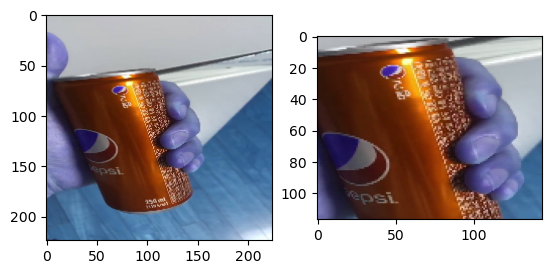

In [209]:
checkPred(x_test, y_test, pred, 10)

# Model Googlenet(s)

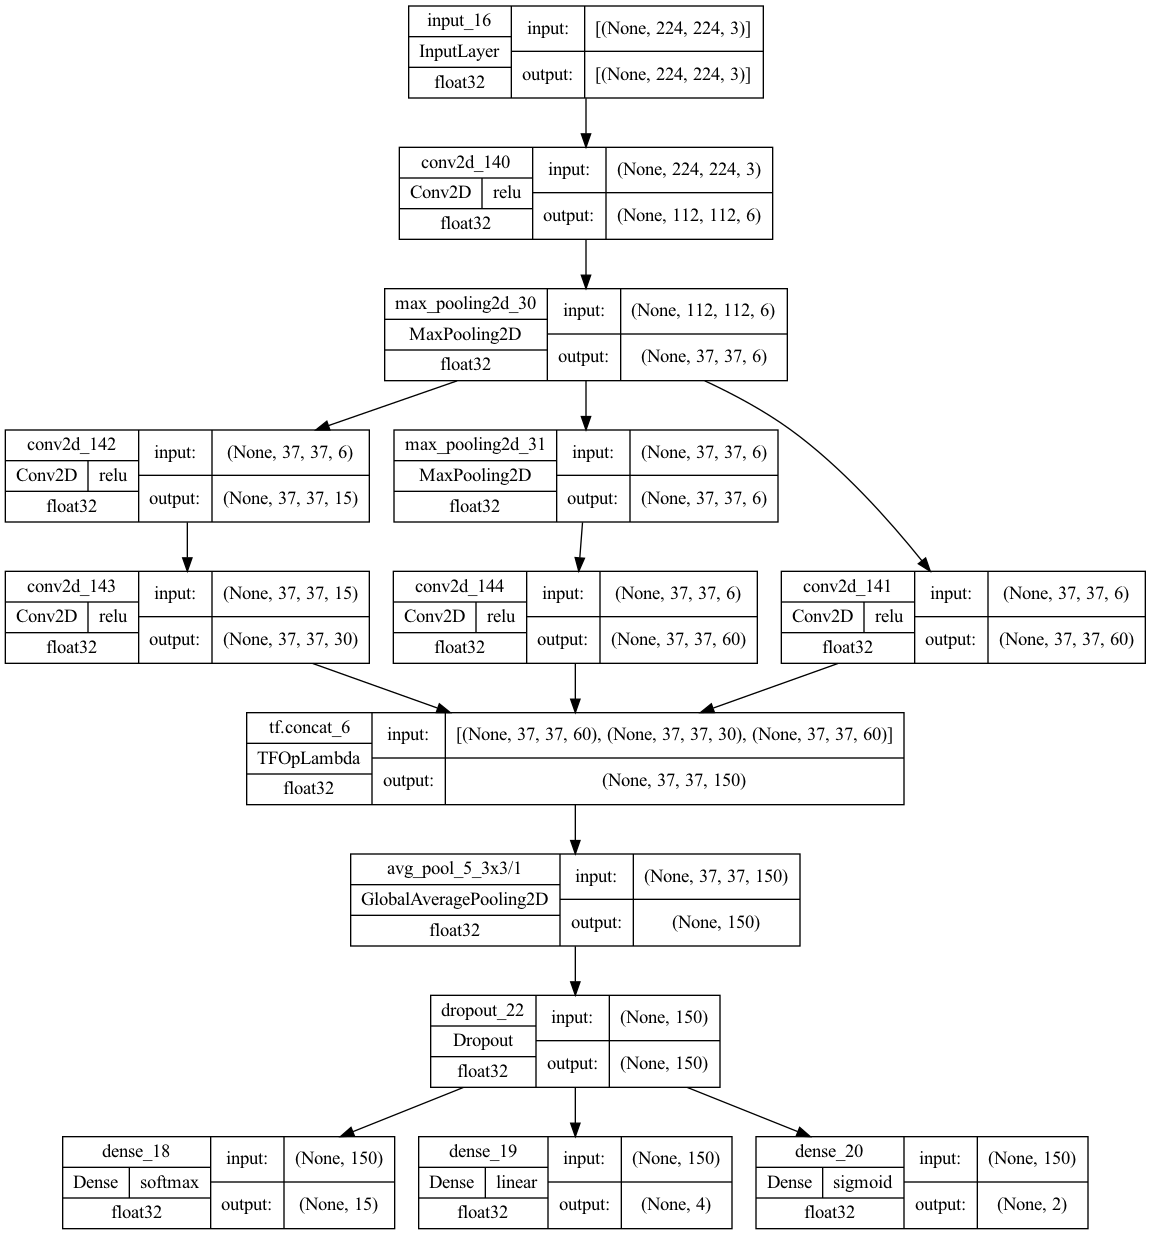

In [128]:
inputs = Input(shape=(224, 224, 3))
x = Conv2D(filters=6, kernel_size=5, strides=2, padding='same', activation='relu')(inputs)
x = MaxPooling2D(3, 3)(x)

x1 = Conv2D(filters=60, kernel_size=1, strides=1, padding='same', activation='relu')(x)            
# x2 = Conv2D(filters=15, kernel_size=1, strides=1, padding='same', activation='relu')(x)
# x2 = Conv2D(filters=30, kernel_size=3, strides=1, padding='same', activation='relu')(x2)

x2 = Conv2D(filters=15, kernel_size=1, strides=1, padding='same', activation='relu')(x)
x2 = Conv2D(filters=30, kernel_size=5, strides=1, padding='same', activation='relu')(x2)

x3 = MaxPooling2D(pool_size=(3, 3), strides=1, padding='same')(x)  
x3 = Conv2D(filters=60, kernel_size=1, strides=1, padding='same', activation='relu')(x3)

outputs = tf.concat([x1, x2, x3], axis=3)
x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(outputs)
y = Dropout(0.25)(x)
outputs1 = Dense(15, activation= 'softmax')(y)
outputs2 = Dense(4, activation= 'linear')(y)
outputs3 = Dense(2, activation= 'sigmoid')(y)


model_r = tf.keras.Model(inputs=inputs, outputs=[outputs1, outputs2, outputs3])

model_r.compile(optimizer='adam',
              loss=['categorical_crossentropy',
                   'mse',
                   'binary_crossentropy'],
              # loss_weights=[0.5, 0.5, 0.5],
              #No OneHot Encoding : sparse_categorical_crossentropy
              metrics=['accuracy']) #acc, accuracy

plot_model(model_r, show_shapes=True, show_dtype=True, show_layer_activations=True)


In [129]:
history_2 = model.fit(x_train, [y_train_c, y_train_4, y_train_o], 
                    validation_data = (x_test, [y_test_c, y_test_4, y_test_o]), 
                    epochs=15, batch_size=64) # , callbacks=my_callback


Epoch 1/15
189/189 [==============================] - 204s 1s/step - loss: 419.5449 - output_loss: 0.5710 - output1_loss: 838.4436 - output2_loss: 0.0758 - output_accuracy: 0.8307 - output1_accuracy: 0.5580 - output2_accuracy: 0.9754 - val_loss: 375.0829 - val_output_loss: 0.2173 - val_output1_loss: 749.9240 - val_output2_loss: 0.0244 - val_output_accuracy: 0.9245 - val_output1_accuracy: 0.5493 - val_output2_accuracy: 0.9901
Epoch 2/15
189/189 [==============================] - 206s 1s/step - loss: 376.6034 - output_loss: 0.3767 - output1_loss: 752.7783 - output2_loss: 0.0518 - output_accuracy: 0.8761 - output1_accuracy: 0.5630 - output2_accuracy: 0.9818 - val_loss: 396.9374 - val_output_loss: 0.1051 - val_output1_loss: 793.7540 - val_output2_loss: 0.0158 - val_output_accuracy: 0.9603 - val_output1_accuracy: 0.5924 - val_output2_accuracy: 0.9954
Epoch 3/15
189/189 [==============================] - 204s 1s/step - loss: 372.7879 - output_loss: 0.3415 - output1_loss: 745.1865 - output2_l

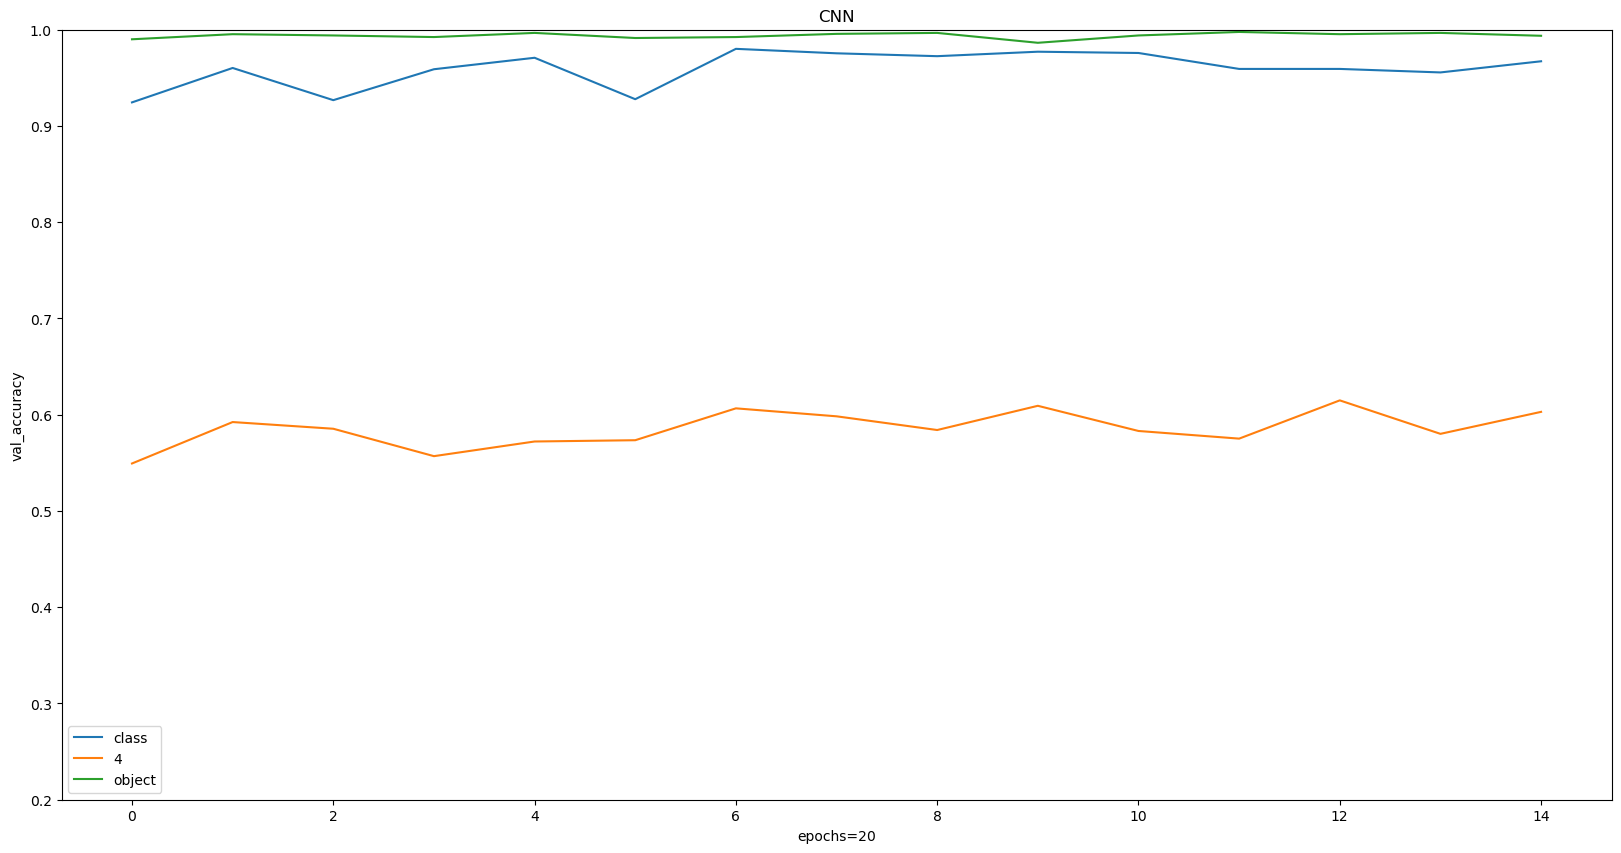

In [130]:
plt.figure(figsize=(20,10))

plt.plot(history.history['val_output_accuracy'], label='class')
plt.plot(history.history['val_output1_accuracy'], label='4')
plt.plot(history.history['val_output2_accuracy'], label='object')

plt.ylim(0.2, 1)
plt.title("CNN")
plt.ylabel("val_accuracy")
plt.xlabel("epochs=20")
plt.legend()

In [131]:
pred_r = model_r.predict(x_test)

95/95 [==============================] - 6s 66ms/step


In [216]:
pred_r[1][50]

array([ -5.5812902, -41.273544 , -55.444073 ,  -4.5117645], dtype=float32)

ValueError: zero-size array to reduction operation minimum which has no identity

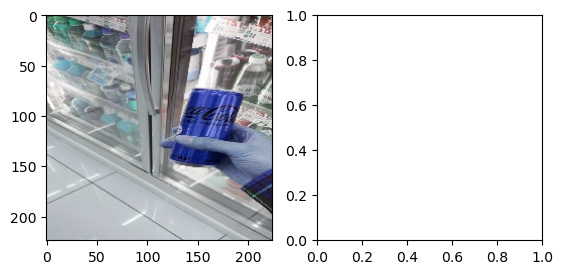

In [211]:
checkPred(x_test, y_test, pred_r, 3)

# Check IoU

In [249]:
def IoU(box1, box2):
    # box = (x1, y1, x2, y2)
    box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)

    # obtain x1, y1, x2, y2 of the intersection
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    # compute the width and height of the intersection
    w = max(0, x2 - x1 + 1)
    h = max(0, y2 - y1 + 1)

    inter = w * h
    iou = inter / (box1_area + box2_area - inter)
    return iou

In [250]:
count = 0
for i in range(len(pred[0])):
    if pred[2][i][1] > 0.7:
        w, h, x, y = pred[1][i][0], pred[1][i][1], pred[1][i][2], pred[1][i][3]
        box_pred = int(x - w / 2), int(y - h / 2), int(x + w/2), int(y + h/2)

        w, h, x, y = y_test_4[i][0], y_test_4[i][1], y_test_4[i][2], y_test_4[i][3]
        box_labeled = int(x - w / 2), int(y - h / 2), int(x + w/2), int(y + h/2)
        if IoU(box_pred, box_labeled) < 0.5:
            count =+ 1
print('rate : ', 1- (count / len(pred[0])))

rate :  0.9996688741721854


In [3]:
print(tf.reduce_sum(tf.random.normal([1000, 1000])))
print("# GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

tf.Tensor(-554.21716, shape=(), dtype=float32)
# GPUs Available:  0


# YOLO

In [4]:
import torch.distributed as dist #파이토치 임포트
import torch.nn as nn

In [7]:
%cd /Users/werther/yolov5/
!pip install -r requirements.txt

/Users/werther/yolov5
  Using cached GitPython-3.1.29-py3-none-any.whl (182 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)


  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)


In [11]:
!curl -L "https://public.roboflow.com/ds/SaLVXHh1i8?key=4piT0rHHUE" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   1959      0 --:--:-- --:--:-- --:--:--  1962
100 66.9M  100 66.9M    0     0  29.4M      0  0:00:02  0:00:02 --:--:-- 41.7M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg  
 extracting: test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg  
 extracting: test/images/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg  
 extracting: test/images/IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg  
 extracting: test/images/IMG_2354_jpeg_jpg.rf.396e872c7fb0a95e911806986995ee7a.jpg  
 extracting: test/images/IMG_2371_jpeg_jpg.rf.54505f60b6706da151c164188c30584

 extracting: test/labels/IMG_8404_jpg.rf.265b89e862a375f6b89f781ea60ed480.txt  
 extracting: test/labels/IMG_8420_jpg.rf.31f1d5f1440e48ccf1dee988b565911b.txt  
 extracting: test/labels/IMG_8452_jpg.rf.6bbff701ab93e29553b3a70137fd4e66.txt  
 extracting: test/labels/IMG_8490_jpg.rf.1836542cf054c6d303a2dd05d4194d7f.txt  
 extracting: test/labels/IMG_8497_MOV-0_jpg.rf.5c59bd1bf7d8fd7a20999d51a79a12c0.txt  
 extracting: test/labels/IMG_8497_MOV-3_jpg.rf.fd813e14681c8b41e709a500748ce46a.txt  
 extracting: test/labels/IMG_8497_MOV-5_jpg.rf.3deffb208d656b7845661c5e33dd1afb.txt  
 extracting: test/labels/IMG_8513_MOV-0_jpg.rf.2a2f77e3f73630b60aaf6ad3ca4ed130.txt  
 extracting: test/labels/IMG_8515_jpg.rf.98a9daca7c5a5bad9872bd7fb2d4f198.txt  
 extracting: test/labels/IMG_8582_MOV-0_jpg.rf.aa8304d7a5112d63c8841d96160d42cd.txt  
 extracting: test/labels/IMG_8582_MOV-3_jpg.rf.c7dde0639837077f76428d70223368a4.txt  
 extracting: test/labels/IMG_8582_MOV-5_jpg.rf.9d7a26fbf145ce39ab0831b4e6bc1f1e.txt 

 extracting: train/images/IMG_2402_jpeg_jpg.rf.ff2e5af0a2d1693c155a01d7494fc8e4.jpg  
 extracting: train/images/IMG_2403_jpeg_jpg.rf.fc3a8f234fe9214577fc7f5d2df940b6.jpg  
 extracting: train/images/IMG_2405_jpeg_jpg.rf.a2556645dee0dd9c64327b09b4a4f6f8.jpg  
 extracting: train/images/IMG_2406_jpeg_jpg.rf.1188b08782ffbc29af95b22721ca6015.jpg  
 extracting: train/images/IMG_2408_jpeg_jpg.rf.e0e6c527f73aed3fdbdd2cabeea44fe0.jpg  
 extracting: train/images/IMG_2409_jpeg_jpg.rf.2de52b31d07502007ce8e96350212d7c.jpg  
 extracting: train/images/IMG_2410_jpeg_jpg.rf.28e599148c43192990cc399a4940f016.jpg  
 extracting: train/images/IMG_2412_jpeg_jpg.rf.31034ae005fc4ba75a20f94f91e4bbc5.jpg  
 extracting: train/images/IMG_2413_jpeg_jpg.rf.695815e23abdea80c043bb1cfd5a8a73.jpg  
 extracting: train/images/IMG_2414_jpeg_jpg.rf.980c706f21682aa6d010cc7a43f9f12c.jpg  
 extracting: train/images/IMG_2415_jpeg_jpg.rf.ebf0f6afed62125f3a07b177ff1eb41b.jpg  
 extracting: train/images/IMG_2417_jpeg_jpg.rf.3126d83

 extracting: train/images/IMG_2598_jpeg_jpg.rf.5650ef75065f27a08cb74975840016a5.jpg  
 extracting: train/images/IMG_2600_jpeg_jpg.rf.a21b557f64e4a16ae3678de9aef1923a.jpg  
 extracting: train/images/IMG_2601_jpeg_jpg.rf.6db2e040b561c055befb49ca877632b3.jpg  
 extracting: train/images/IMG_2603_jpeg_jpg.rf.6d8a5a94a16c04784eae01d5d07f8cbe.jpg  
 extracting: train/images/IMG_2604_jpeg_jpg.rf.993c6667a03fd897ea35c645df9ee93d.jpg  
 extracting: train/images/IMG_2605_jpeg_jpg.rf.2d62821e1b21d2a61a98252c59a4042e.jpg  
 extracting: train/images/IMG_2606_jpeg_jpg.rf.27e5a373d43d2535a923e1089bf60051.jpg  
 extracting: train/images/IMG_2608_jpeg_jpg.rf.9ba9cc2485112df87a73dee448aad2bc.jpg  
 extracting: train/images/IMG_2609_jpeg_jpg.rf.812bb452a59431bc957f24c60300dfee.jpg  
 extracting: train/images/IMG_2610_jpeg_jpg.rf.4d5cf5cfdceb7dee102fe730fc1f6776.jpg  
 extracting: train/images/IMG_2611_jpeg_jpg.rf.dbd7d022107e21b1ff23e3b75b6f81ea.jpg  
 extracting: train/images/IMG_2612_jpeg_jpg.rf.4d3cb56

 extracting: train/images/IMG_8496_MOV-1_jpg.rf.bfb30108c5b8c7ebd0b92028435ba919.jpg  
 extracting: train/images/IMG_8496_MOV-3_jpg.rf.ace3fc49d60c36ebd061bf9136264aea.jpg  
 extracting: train/images/IMG_8496_MOV-4_jpg.rf.5a57e10d66c22e0dd54f16fc0d9ea2d8.jpg  
 extracting: train/images/IMG_8496_MOV-5_jpg.rf.eacca955182a03a262de9b2c4012ecc4.jpg  
 extracting: train/images/IMG_8496_MOV-6_jpg.rf.1a2f4660fc24ccab8c1f78b2aa6ca1d3.jpg  
 extracting: train/images/IMG_8497_MOV-1_jpg.rf.40946c619f2980cf22ef4e1414e9aaaf.jpg  
 extracting: train/images/IMG_8500_jpg.rf.95c3f3780b381dea7a27e2042ecea9c6.jpg  
 extracting: train/images/IMG_8502_jpg.rf.81783141b72ae29e514d677ca0f5082d.jpg  
 extracting: train/images/IMG_8509_jpg.rf.2c289b209622afd8e8aac913c35008d7.jpg  
 extracting: train/images/IMG_8510_jpg.rf.c6030dc16e5b84b2532aec1e07df4e50.jpg  
 extracting: train/images/IMG_8511_jpg.rf.0613c7cf6abb8e5201e65def1c22805c.jpg  
 extracting: train/images/IMG_8512_MOV-0_jpg.rf.44c1fce444824e3210a1d6bb5

 extracting: train/labels/IMG_2509_jpeg_jpg.rf.0c8d6158f08975bd24497a5fb02572d2.txt  
 extracting: train/labels/IMG_2511_jpeg_jpg.rf.4593a8e1ea4e285da455b895a36fa2c7.txt  
 extracting: train/labels/IMG_2513_jpeg_jpg.rf.1c33f6aee29f24622179b3c188effe59.txt  
 extracting: train/labels/IMG_2515_jpeg_jpg.rf.c7255981abc23128903ac9ece1b4d8b5.txt  
 extracting: train/labels/IMG_2516_jpeg_jpg.rf.6f719df754865fe6166afd0a3a78d60f.txt  
 extracting: train/labels/IMG_2518_jpeg_jpg.rf.5f4e0d8f980eaa632ff94853995eff9e.txt  
 extracting: train/labels/IMG_2520_jpeg_jpg.rf.4cab9c74da59c93865ed205f4dcf8c46.txt  
 extracting: train/labels/IMG_2521_jpeg_jpg.rf.dde07699f153cc149b5d057924e983c5.txt  
 extracting: train/labels/IMG_2524_jpeg_jpg.rf.87f4a069ac66bc31523d434d04f9d2d6.txt  
 extracting: train/labels/IMG_2527_jpeg_jpg.rf.3de0e3c95781ea109647310c017ca1fc.txt  
 extracting: train/labels/IMG_2528_jpeg_jpg.rf.2bd17b3a6751de79eab0f91356230d98.txt  
 extracting: train/labels/IMG_2529_jpeg_jpg.rf.16e6434

 extracting: valid/images/IMG_2305_jpeg_jpg.rf.9590ed0a48add800dc5ea8d3f85d3469.jpg  
 extracting: valid/images/IMG_2317_jpeg_jpg.rf.f30ebbdde1be950767da30bd3fbc1493.jpg  
 extracting: valid/images/IMG_2318_jpeg_jpg.rf.f073a5ac61db9f821cc03d23f4a22ea6.jpg  
 extracting: valid/images/IMG_2323_jpeg_jpg.rf.035c5370cfa9efce40a515ce4ec72179.jpg  
 extracting: valid/images/IMG_2325_jpeg_jpg.rf.a8ebf587a5ae7d2f8c58f977583e344c.jpg  
 extracting: valid/images/IMG_2329_jpeg_jpg.rf.4a1c2bdd0841672f2b75310a8276bfdc.jpg  
 extracting: valid/images/IMG_2333_jpeg_jpg.rf.0dfdf7c17f438c4a2eacebdfef82bdeb.jpg  
 extracting: valid/images/IMG_2334_jpeg_jpg.rf.b545bdad952bf47fbadb8ee504e52c36.jpg  
 extracting: valid/images/IMG_2337_jpeg_jpg.rf.8c0fdb28fa8bfd6adf906153bb4c90a2.jpg  
 extracting: valid/images/IMG_2339_jpeg_jpg.rf.f31a698f6d75d00ce27b24801b6d88dd.jpg  
 extracting: valid/images/IMG_2342_jpeg_jpg.rf.f36e481b4e01c2e76e0b27e494682873.jpg  
 extracting: valid/images/IMG_2345_jpeg_jpg.rf.1c32346

In [13]:
from glob import glob

train_list = glob('/Users/werther/yolov5/train/images/*.jpg')
test_list = glob('/Users/werther/yolov5/test/images/*.jpg')
print(len(train_list))
print(len(test_list))


448
63


In [16]:
%cd /Users/werther/yolov5/
!python train.py --img 416 --batch 16 --epochs 100 --data /content/dataset/data.yaml --cfg ./modles/yolov5s.yaml --weights yolov5s.pt --name aquarium_yolov5s_results


/Users/werther/yolov5
train: weights=yolov5s.pt, cfg=./modles/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=aquarium_yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 2 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
Traceback (most recent call last):
  File "/Users/werther/yolov5/train.py", line 633, in <module>
    main(opt)
  File "/Users/werther/yolov5/train.py", line 502, in main
    check_file(opt.data), check_yaml

In [89]:
file_path = '/Users/werther/yolov5/data/images/Drink/train/' # 바꿔야하는 이미지가 들어있는 파일
file_names = os.listdir(file_path)

print(file_names[:10])

['sprite355_540.jpg.txt', 'chilsung_250_332.jpg', 'coca_cola_350_217.jpg', 'chilsung_355_137.jpg.txt', 'coca_cola_zero_355_465.jpg.txt', 'pepsi_250_115.jpg', 'sprite250_659.jpg.txt', 'pepsi_zero_500_264.jpg.txt', 'pocari_620_287.jpg', 'pepsi_zero_355_1314.jpg']


In [130]:
%cd /Users/werther/yolov5/
 
!python train.py  --batch 16 --epochs 10 --data ./data/coco128Drink.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name yolov5_coco_drink --cache ram

# --img 640
# !python detect.py --source 0 --weights .\

"/Users/werther/yolov5/data/images/Drink/"


/Users/werther/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=./data/coco128Drink.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5_coco_drink, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 2 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v7.0-40-gb2a0f1c Python-3.9.13 torch-1.13.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=

'/Users/werther/yolov5/data/images/Drink/'

In [ ]:
# [모델 학습 코드]
(yolov5) PS C:\Users\Playdata\yolov5> python train.py --data ./data/yolo_drinks.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --batch 16 --epochs 10 --name drinks50
    
# [학습 후 검출] - source 뒤에 경로 지정(0일경우 웹캠)
python detect.py --source 0 --weights .\runs\train\drinks502\weights\best.pt

'/Users/werther/yolov5/data/Dr'

